In [1]:
import matplotlib.pyplot as plt  
import pandas as pd  
%matplotlib inline
import numpy as np 
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
data1=pd.read_csv('C:/Users/loren/Desktop/LSBU/Statistical Analysis/coursework1/codes/sales_data_sample_utf8.csv')

In [3]:
data1

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,05/07/2003 00:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,07/01/2003 00:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 00:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
5,10168,36,96.66,1,3479.76,10/28/2003 0:00,Shipped,4,10,2003,...,9408 Furth Circle,NaN,Burlingame,CA,94217,USA,NaN,Hirano,Juri,Medium
6,10180,29,86.13,9,2497.77,11/11/2003 00:00,Shipped,4,11,2003,...,"184, chausse de Tournai",NaN,Lille,NaN,59000,France,EMEA,Rance,Martine,Small
7,10188,48,100.00,1,5512.32,11/18/2003 0:00,Shipped,4,11,2003,...,"Drammen 121, PR 744 Sentrum",NaN,Bergen,NaN,N 5804,Norway,EMEA,Oeztan,Veysel,Medium
8,10201,22,98.57,2,2168.54,12/01/2003 00:00,Shipped,4,12,2003,...,5557 North Pendale Street,NaN,San Francisco,CA,NaN,USA,NaN,Murphy,Julie,Small
9,10211,41,100.00,14,4708.44,1/15/2004 0:00,Shipped,1,1,2004,...,"25, rue Lauriston",NaN,Paris,NaN,75016,France,EMEA,Perrier,Dominique,Medium


In [4]:
x = data1.iloc[:, [1, 2, 4]].values
x

array([[  30.  ,   95.7 , 2871.  ],
       [  34.  ,   81.35, 2765.9 ],
       [  41.  ,   94.74, 3884.34],
       ...,
       [  43.  ,  100.  , 5417.57],
       [  34.  ,   62.24, 2116.16],
       [  47.  ,   65.52, 3079.44]])

In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, init = 'random', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
print(y_kmeans)

[2 2 1 ... 1 2 2]


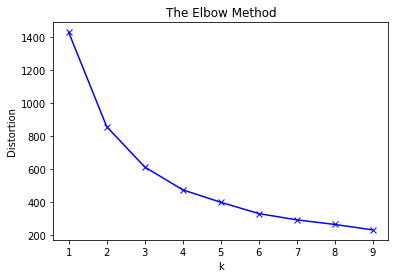

In [6]:
# determine k using elbow method
from sklearn import metrics
from scipy.spatial.distance import cdist

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(x)
    kmeanModel.fit(x)
    distortions.append(sum(np.min(cdist(x, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / x.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method')
plt.show()

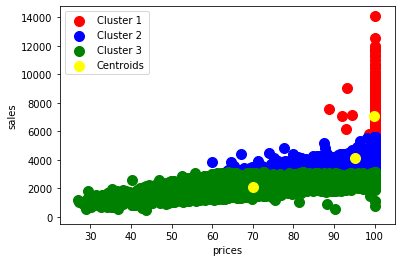

In [7]:
plt.scatter(x[y_kmeans == 0,1], x[y_kmeans == 0,2], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1,1], x[y_kmeans == 1,2], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2,1], x[y_kmeans == 2,2], s = 100, c = 'green', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:,2], s = 100, c = 'yellow', label = 'Centroids')
plt.xlabel('prices')
plt.ylabel('sales')
plt.legend()

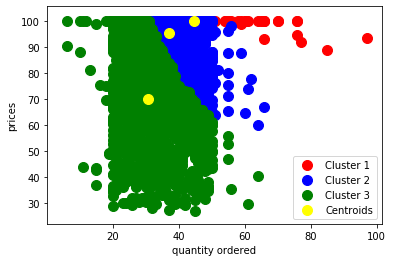

In [8]:
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1], s = 100, c = 'green', label = 'Cluster 3')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.xlabel('quantity ordered')
plt.ylabel('prices')
plt.legend()  

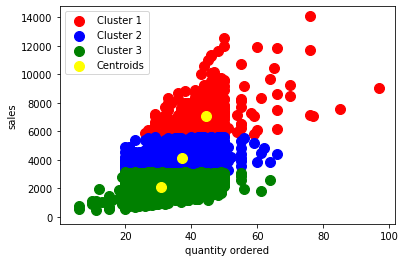

In [9]:
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,2], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,2], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,2], s = 100, c = 'green', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,2], s = 100, c = 'yellow', label = 'Centroids')
plt.xlabel('quantity ordered')
plt.ylabel('sales')
plt.legend()
